# import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# read the file

In [2]:
df=pd.read_csv("Football+Scholarship.csv")
df

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.270,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.300,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.280,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.230,0.32,Moderate,C,0.40,9.9,Eastern,Partial
4,7.2,0.230,0.32,Moderate,C,0.40,9.9,Eastern,Partial
...,...,...,...,...,...,...,...,...,...
6210,6.8,0.620,0.08,Low,C,0.82,9.5,Eastern,Full
6211,6.2,0.600,0.08,Low,C,0.58,10.5,Western,Full
6212,5.9,0.550,0.10,Low,C,0.76,11.2,Eastern,Full
6213,6.3,0.510,0.13,Low,C,0.75,11.0,Eastern,Full


# check for duplicates

In [3]:
duplicate=df.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))
df[duplicate]

Number of duplicate rows = 947


,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
4,7.2,0.230,0.32,Moderate,C,0.40,9.9,Eastern,Partial
5,8.1,0.280,0.40,Moderate,C,0.44,10.1,Eastern,Partial
7,7.0,0.270,0.36,High,D,0.45,8.8,Eastern,Partial
8,6.3,0.300,0.34,Low,C,0.49,9.5,Eastern,Partial
36,7.3,0.240,0.39,High,D,0.36,8.6,Southern,Partial
...,...,...,...,...,...,...,...,...,...
6180,7.2,0.695,0.13,Low,C,0.54,10.1,Western,Full
6181,7.2,0.695,0.13,Low,C,0.54,10.1,Western,Full
6184,7.2,0.695,0.13,Low,C,0.54,10.1,Western,Full
6198,6.2,0.560,0.09,Low,C,0.60,11.3,Western,Full


# drop duplicates

In [4]:
df.drop_duplicates(inplace=True)

# check for null values

In [5]:
df.isnull().sum()

Academic_Score         0
Score_on_Plays_Made    0
Missed_Play_Score      0
Injury_Propensity      0
School_Type            0
School_Score           0
Overall_Score          0
Region                 0
Scholarship            0
dtype: int64

# check info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       5268 non-null   float64
 1   Score_on_Plays_Made  5268 non-null   float64
 2   Missed_Play_Score    5268 non-null   float64
 3   Injury_Propensity    5268 non-null   object 
 4   School_Type          5268 non-null   object 
 5   School_Score         5268 non-null   float64
 6   Overall_Score        5268 non-null   float64
 7   Region               5268 non-null   object 
 8   Scholarship          5268 non-null   object 
dtypes: float64(5), object(4)
memory usage: 411.6+ KB


# descriptive stats for continous variable

In [7]:
df.describe()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score
count,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000
mean,7.205363,0.337905,0.320306,0.531380,10.502904
std,1.299212,0.161308,0.146286,0.146938,1.169325
min,3.800000,0.080000,0.000000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,0.430000,9.500000
50%,6.900000,0.290000,0.310000,0.510000,10.300000
75%,7.700000,0.400000,0.400000,0.600000,11.300000
max,15.900000,1.330000,1.660000,1.980000,14.900000


# plot boxplot and distplot for continous variables

In [8]:
col= list(df.select_dtypes(include=['float64','int64']).columns.values)
col

['Academic_Score',
 'Score_on_Plays_Made',
 'Missed_Play_Score',
 'School_Score',
 'Overall_Score']

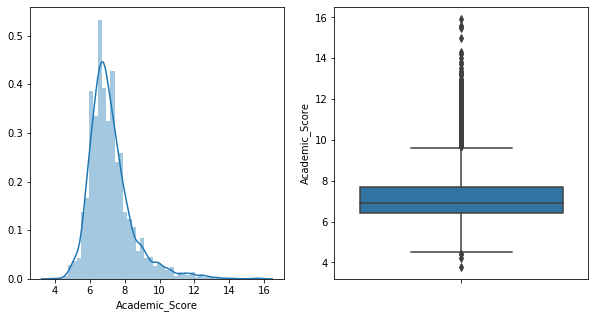

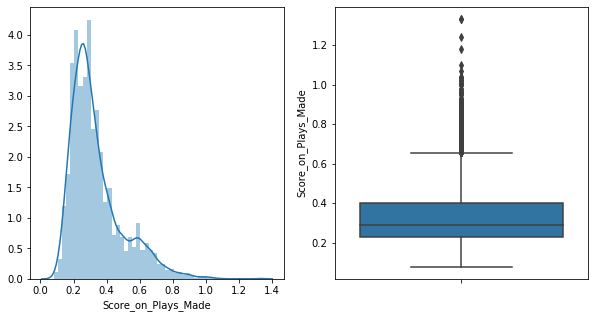

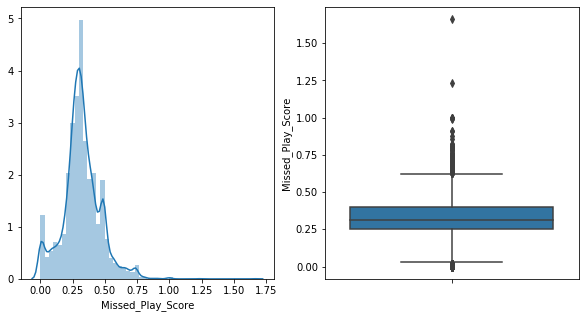

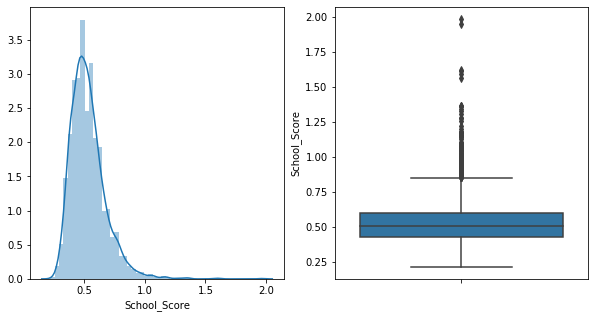

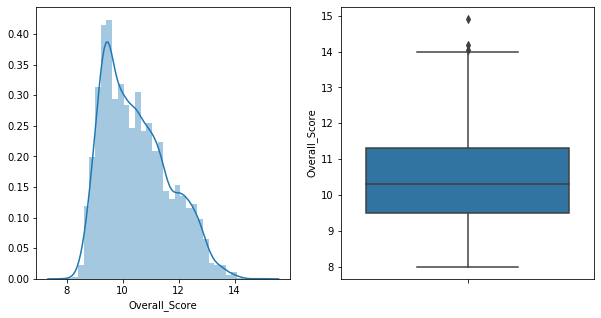

In [9]:
for i in col:
    fig_dims = (10, 5) 
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=fig_dims) 
    sns.distplot(df[i], kde=True, ax=axs[0]) 
    sns.boxplot(x= i, data=df, ax=axs[1],orient="v") 

# function for countplot for categorical variables

In [10]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df[cat_column].value_counts()/df.shape[0])
    sns.countplot(x=cat_column, data=df, palette='pastel')
    plt.show()
    print("       ")

In [11]:
df_object = df.select_dtypes(include = ['object']) 
lstcatcolumns = list(df_object.columns.values)
lstcatcolumns

['Injury_Propensity', 'School_Type', 'Region', 'Scholarship']

Details of Injury_Propensity
----------------------------------------------------------------
Low         0.440964
Normal      0.220577
Moderate    0.169514
High        0.168945
Name: Injury_Propensity, dtype: float64


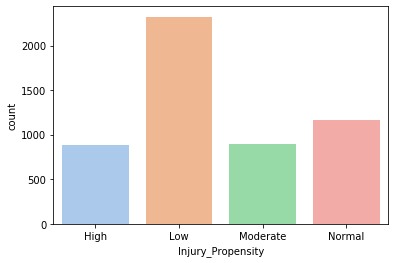

       
Details of School_Type
----------------------------------------------------------------
C    0.551632
B    0.274487
D    0.173880
Name: School_Type, dtype: float64


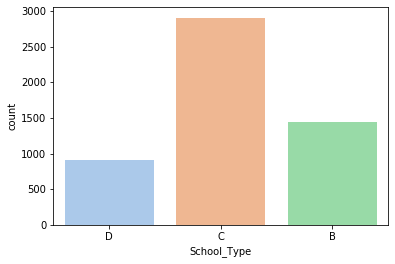

       
Details of Region
----------------------------------------------------------------
Eastern     0.456150
Western     0.276576
Southern    0.267274
Name: Region, dtype: float64


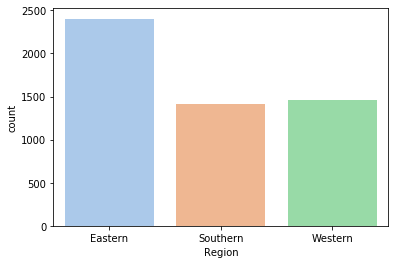

       
Details of Scholarship
----------------------------------------------------------------
Partial    0.633447
Full       0.366553
Name: Scholarship, dtype: float64


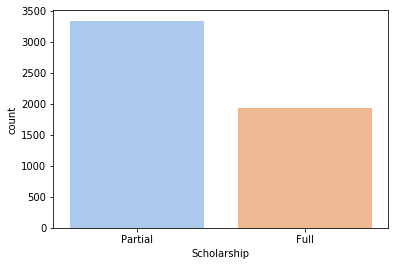

In [12]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

# bi-variate analysis for numerical columns

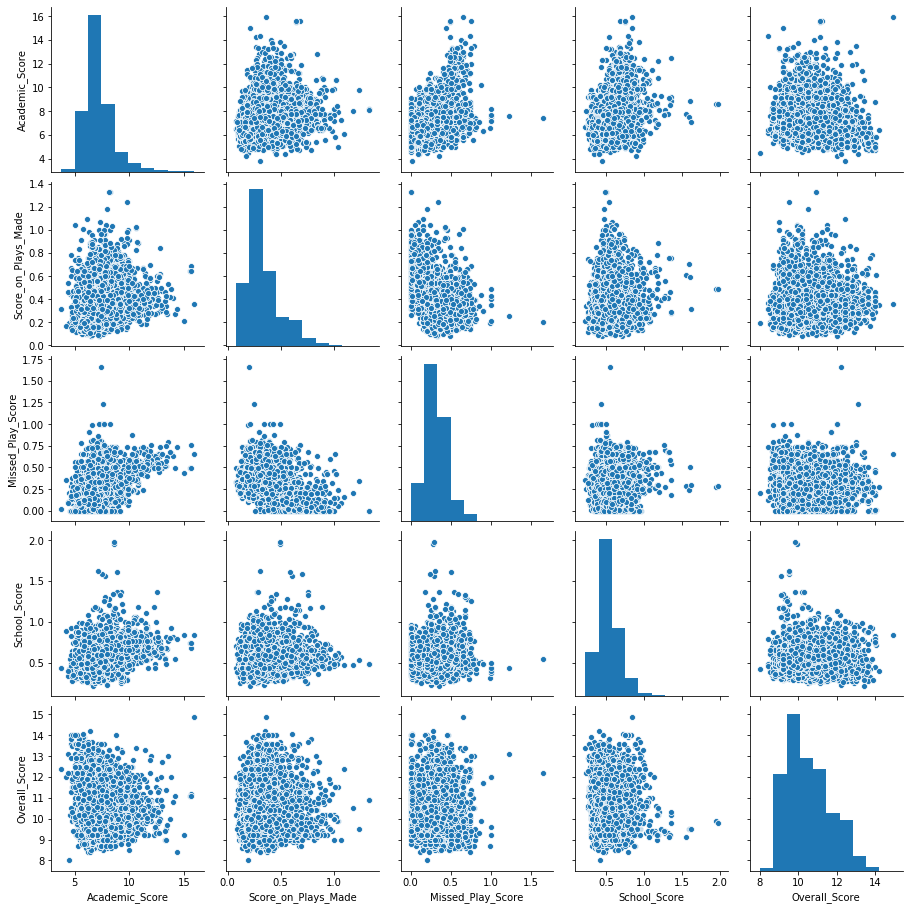

In [13]:
sns.pairplot(df)

# correlation matrix

In [14]:
df.corr()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score
Academic_Score,1.000000,0.221827,0.325630,0.309948,-0.082724
Score_on_Plays_Made,0.221827,1.000000,-0.365806,0.241303,-0.059938
Missed_Play_Score,0.325630,-0.365806,1.000000,0.053136,-0.012555
School_Score,0.309948,0.241303,0.053136,1.000000,-0.005954
Overall_Score,-0.082724,-0.059938,-0.012555,-0.005954,1.000000


# heatmap

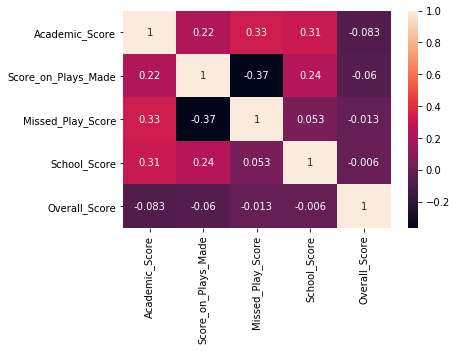

In [15]:
sns.heatmap(df.corr(),annot=True)

# bi-variate analysis for categorical variables

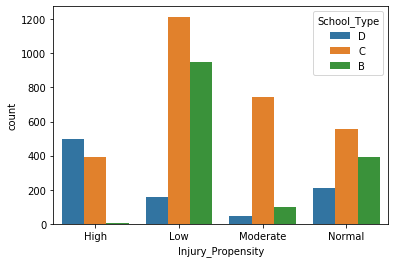

In [16]:
sns.countplot(x=df['Injury_Propensity'],hue=df['School_Type'])

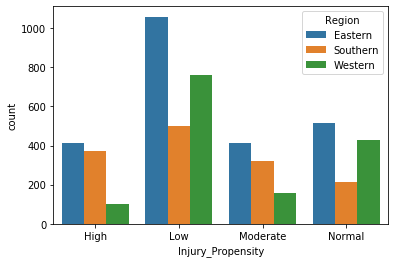

In [17]:
sns.countplot(x=df['Injury_Propensity'],hue=df['Region'])

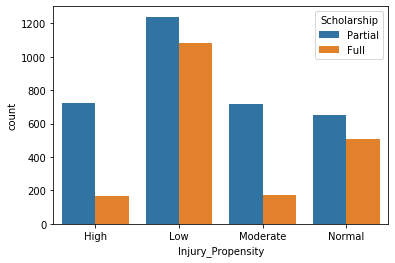

In [18]:
sns.countplot(x=df['Injury_Propensity'],hue=df['Scholarship'])

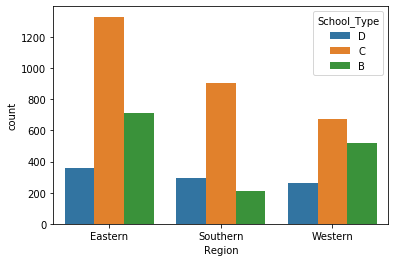

In [19]:
sns.countplot(x=df['Region'],hue=df['School_Type'])

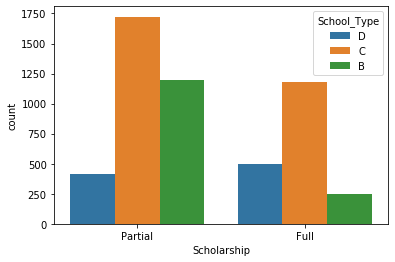

In [20]:
sns.countplot(x=df['Scholarship'],hue=df['School_Type'])

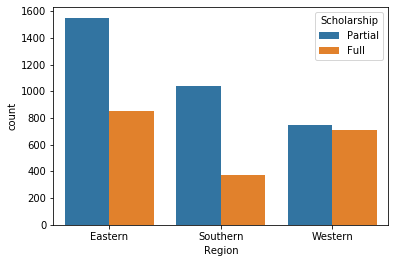

In [21]:
sns.countplot(x=df['Region'],hue=df['Scholarship'])

# crosstab for categorical variables

In [22]:
pd.crosstab(df['Injury_Propensity'],df['Region'],normalize='index')

Region,Eastern,Southern,Western
Injury_Propensity,,,
High,0.466292,0.416854,0.116854
Low,0.455446,0.216100,0.328455
Moderate,0.464726,0.357223,0.178052
Normal,0.443201,0.185886,0.370912


In [23]:
pd.crosstab(df['Injury_Propensity'],df['School_Type'],normalize='index')

School_Type,B,C,D
Injury_Propensity,,,
High,0.004494,0.439326,0.556180
Low,0.408523,0.522600,0.068876
Moderate,0.109742,0.835386,0.054871
Normal,0.339931,0.477625,0.182444


In [24]:
pd.crosstab(df['Injury_Propensity'],df['Scholarship'],normalize='columns')

Scholarship,Full,Partial
Injury_Propensity,,
High,0.085448,0.217261
Low,0.560849,0.371591
Moderate,0.090627,0.215163
Normal,0.263076,0.195984


In [25]:
pd.crosstab(df['Scholarship'],df['Region'],normalize='index')

Region,Eastern,Southern,Western
Scholarship,,,
Full,0.441222,0.192128,0.366649
Partial,0.464789,0.310758,0.224453


In [26]:
pd.crosstab(df['Scholarship'],df['Region'],normalize='columns')

Region,Eastern,Southern,Western
Scholarship,,,
Full,0.354557,0.263494,0.48593
Partial,0.645443,0.736506,0.51407


In [27]:
pd.crosstab(df['School_Type'],df['Region'],normalize='columns')

Region,Eastern,Southern,Western
School_Type,,,
B,0.296296,0.151278,0.357584
C,0.553891,0.640625,0.461908
D,0.149813,0.208097,0.180508


In [28]:
pd.crosstab(df['Scholarship'],df['School_Type'],normalize='columns')

School_Type,B,C,D
Scholarship,,,
Full,0.172891,0.407089,0.543668
Partial,0.827109,0.592911,0.456332


# bi-variate analysis for cat and numerical variables

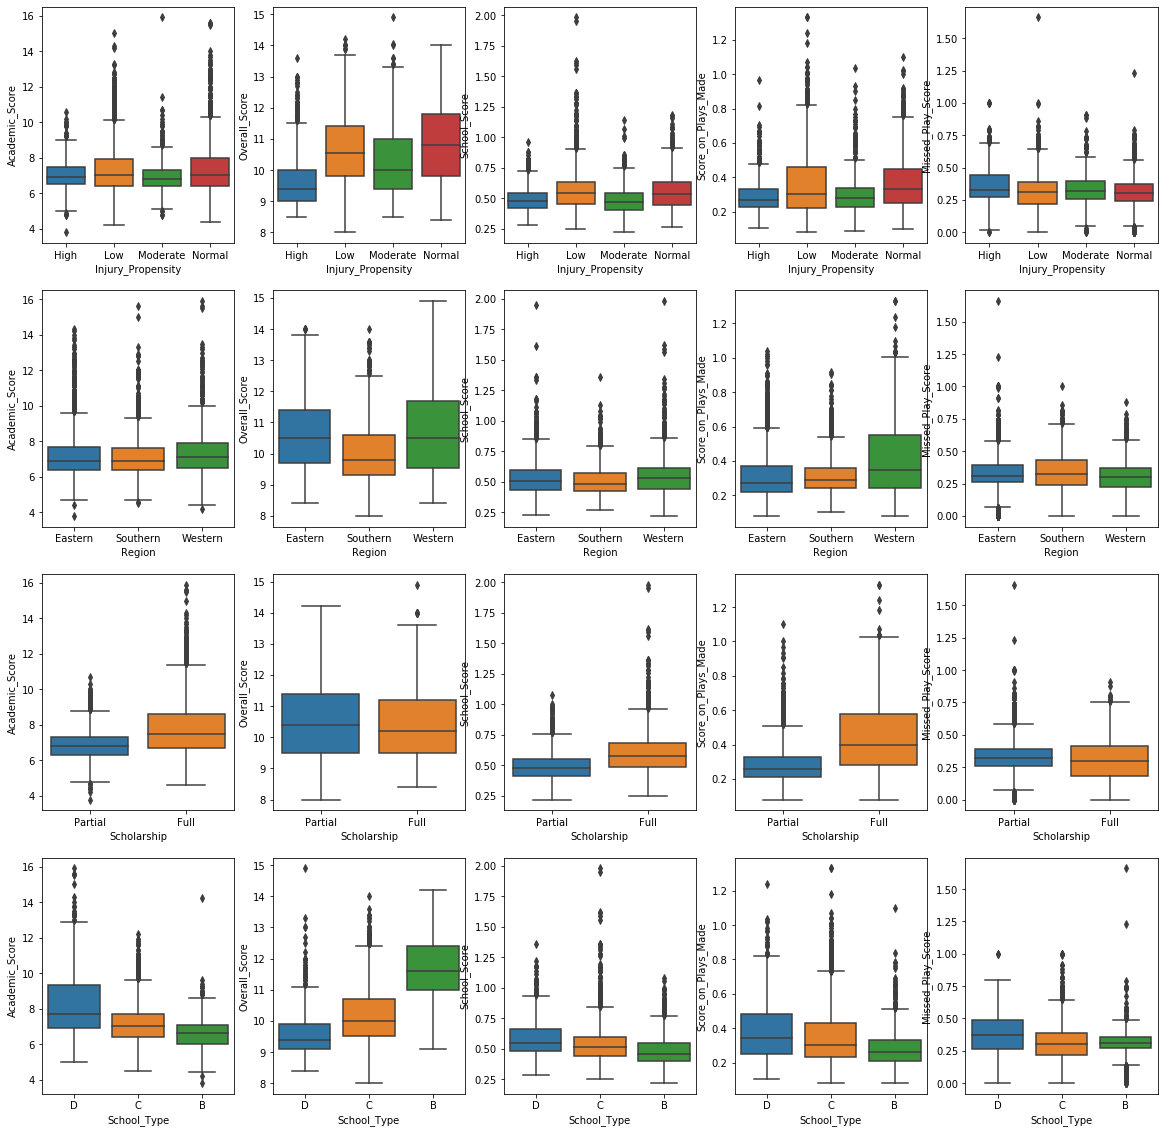

In [29]:
fig_dims = (20, 20)
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=fig_dims)
sns.boxplot(x='Injury_Propensity', y='Academic_Score', data=df, ax=axs[0][0])
sns.boxplot(x='Injury_Propensity', y='Overall_Score', data=df, ax=axs[0][1])
sns.boxplot(x='Injury_Propensity', y='School_Score', data=df, ax=axs[0][2])
sns.boxplot(x='Injury_Propensity', y='Score_on_Plays_Made', data=df, ax=axs[0][3])
sns.boxplot(x='Injury_Propensity', y='Missed_Play_Score', data=df, ax=axs[0][4])
sns.boxplot(x='Region', y='Academic_Score', data=df, ax=axs[1][0])
sns.boxplot(x='Region', y='Overall_Score', data=df, ax=axs[1][1])
sns.boxplot(x='Region', y='School_Score', data=df, ax=axs[1][2])
sns.boxplot(x='Region', y='Score_on_Plays_Made', data=df, ax=axs[1][3])
sns.boxplot(x='Region', y='Missed_Play_Score', data=df, ax=axs[1][4])
sns.boxplot(x='Scholarship', y='Academic_Score', data=df, ax=axs[2][0])
sns.boxplot(x='Scholarship', y='Overall_Score', data=df, ax=axs[2][1])
sns.boxplot(x='Scholarship', y='School_Score', data=df, ax=axs[2][2])
sns.boxplot(x='Scholarship', y='Score_on_Plays_Made', data=df, ax=axs[2][3])
sns.boxplot(x='Scholarship', y='Missed_Play_Score', data=df, ax=axs[2][4])
sns.boxplot(x='School_Type', y='Academic_Score', data=df, ax=axs[3][0])
sns.boxplot(x='School_Type', y='Overall_Score', data=df, ax=axs[3][1])
sns.boxplot(x='School_Type', y='School_Score', data=df, ax=axs[3][2])
sns.boxplot(x='School_Type', y='Score_on_Plays_Made', data=df, ax=axs[3][3])
sns.boxplot(x='School_Type', y='Missed_Play_Score', data=df, ax=axs[3][4])

In [30]:
df1=df.copy()

# change categorical data to numerical

In [31]:
injury={'Injury_Propensity':{'Low':0,'Normal':1,'Moderate':2,'High':3}}

In [32]:
df1.replace(injury,inplace=True)
df1

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.270,0.36,3,D,0.45,8.8,Eastern,Partial
1,6.3,0.300,0.34,0,C,0.49,9.5,Eastern,Partial
2,8.1,0.280,0.40,2,C,0.44,10.1,Eastern,Partial
3,7.2,0.230,0.32,2,C,0.40,9.9,Eastern,Partial
6,6.2,0.320,0.16,2,C,0.47,9.6,Eastern,Full
...,...,...,...,...,...,...,...,...,...
6209,6.3,0.510,0.13,0,C,0.75,11.0,Eastern,Full
6210,6.8,0.620,0.08,0,C,0.82,9.5,Eastern,Full
6211,6.2,0.600,0.08,0,C,0.58,10.5,Western,Full
6212,5.9,0.550,0.10,0,C,0.76,11.2,Eastern,Full


In [33]:
scholar={'Scholarship':{'Partial':0,'Full':1}}

In [34]:
df1.replace(scholar,inplace=True)
df1

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.270,0.36,3,D,0.45,8.8,Eastern,0
1,6.3,0.300,0.34,0,C,0.49,9.5,Eastern,0
2,8.1,0.280,0.40,2,C,0.44,10.1,Eastern,0
3,7.2,0.230,0.32,2,C,0.40,9.9,Eastern,0
6,6.2,0.320,0.16,2,C,0.47,9.6,Eastern,1
...,...,...,...,...,...,...,...,...,...
6209,6.3,0.510,0.13,0,C,0.75,11.0,Eastern,1
6210,6.8,0.620,0.08,0,C,0.82,9.5,Eastern,1
6211,6.2,0.600,0.08,0,C,0.58,10.5,Western,1
6212,5.9,0.550,0.10,0,C,0.76,11.2,Eastern,1


In [35]:
df1= pd.get_dummies(df1,drop_first=True)
df1

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.270,0.36,3,0.45,8.8,0,0,1,0,0
1,6.3,0.300,0.34,0,0.49,9.5,0,1,0,0,0
2,8.1,0.280,0.40,2,0.44,10.1,0,1,0,0,0
3,7.2,0.230,0.32,2,0.40,9.9,0,1,0,0,0
6,6.2,0.320,0.16,2,0.47,9.6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6209,6.3,0.510,0.13,0,0.75,11.0,1,1,0,0,0
6210,6.8,0.620,0.08,0,0.82,9.5,1,1,0,0,0
6211,6.2,0.600,0.08,0,0.58,10.5,1,1,0,0,1
6212,5.9,0.550,0.10,0,0.76,11.2,1,1,0,0,0


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       5268 non-null   float64
 1   Score_on_Plays_Made  5268 non-null   float64
 2   Missed_Play_Score    5268 non-null   float64
 3   Injury_Propensity    5268 non-null   int64  
 4   School_Score         5268 non-null   float64
 5   Overall_Score        5268 non-null   float64
 6   Scholarship          5268 non-null   int64  
 7   School_Type_C        5268 non-null   uint8  
 8   School_Type_D        5268 non-null   uint8  
 9   Region_Southern      5268 non-null   uint8  
 10  Region_Western       5268 non-null   uint8  
dtypes: float64(5), int64(2), uint8(4)
memory usage: 349.8 KB


# build model using statsmodel

In [37]:
import statsmodels.formula.api as sm

In [38]:
df1.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score', 'Scholarship',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western'],
      dtype='object')

In [39]:
formula_1='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Score+Overall_Score+School_Type_C+School_Type_D+Region_Southern+Region_Western'

In [40]:
Logistic_1 = sm.logit(formula=formula_1,data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.442028
         Iterations 7


In [41]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5257
Method:                           MLE   Df Model:                           10
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.3273
Time:                        22:24:00   Log-Likelihood:                -2328.6
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -8.7612      0.547    -16.007      0.000      -9.834      -7.688
Academic_Score          0.4335      0.041     10.626      0.000       0.354       0.513
Score_on_Plays_Made     4.6761      0.306     15.265      0.000       4.076       5.276
Missed_Play_Score      -1.6305      0.325     -5.017      0.000      -2.267      -0.994
Injury_Propensity      -0.5275      0.043    -12.182      0.000      -0.612      -0.443
School_Score            2.7212      0.297      9.172      0.000       2.140       3.303
Overall_Score           0.2002      0.045      4.498      0.000       0.113       0.287
School_Type_C           1.2726      0.124     10.243      0.000       1.029       1.516
School_Type_D           2.2271      0.207     10.777      0.000       1.822       2.632
Region_Southern        -0.4676      0.091     -5.113      0.000      -0.647      -0.288
Region_Western          0.0197      0.092      0.215      0.830      -0.160       0.200
=======================================================================================
"""

# check VIF for multicolinearity

In [42]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [43]:
vif_cal(input_data=df1.drop('Scholarship',axis=1))

Academic_Score  VIF =  1.78
Score_on_Plays_Made  VIF =  1.56
Missed_Play_Score  VIF =  1.5
Injury_Propensity  VIF =  1.74
School_Score  VIF =  1.26
Overall_Score  VIF =  1.97
School_Type_C  VIF =  2.88
School_Type_D  VIF =  4.17
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.25


# remove the least significant predictor: Region_Western and build model again

In [44]:
formula_2='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Score+Overall_Score+School_Type_C+School_Type_D+Region_Southern'

In [45]:
Logistic_2 = sm.logit(formula=formula_2,data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.442033
         Iterations 7


In [46]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5258
Method:                           MLE   Df Model:                            9
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.3273
Time:                        22:24:00   Log-Likelihood:                -2328.6
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -8.7559      0.547    -16.012      0.000      -9.828      -7.684
Academic_Score          0.4338      0.041     10.636      0.000       0.354       0.514
Score_on_Plays_Made     4.6876      0.302     15.545      0.000       4.097       5.279
Missed_Play_Score      -1.6320      0.325     -5.024      0.000      -2.269      -0.995
Injury_Propensity      -0.5282      0.043    -12.237      0.000      -0.613      -0.444
School_Score            2.7212      0.297      9.172      0.000       2.140       3.303
Overall_Score           0.2001      0.045      4.496      0.000       0.113       0.287
School_Type_C           1.2706      0.124     10.257      0.000       1.028       1.513
School_Type_D           2.2262      0.207     10.775      0.000       1.821       2.631
Region_Southern        -0.4745      0.086     -5.537      0.000      -0.642      -0.307
=======================================================================================
"""

# again calculate VIF

In [47]:
vif_cal(input_data=df1.drop(['Scholarship','Region_Western'],axis=1))

Academic_Score  VIF =  1.78
Score_on_Plays_Made  VIF =  1.5
Missed_Play_Score  VIF =  1.5
Injury_Propensity  VIF =  1.73
School_Score  VIF =  1.26
Overall_Score  VIF =  1.97
School_Type_C  VIF =  2.86
School_Type_D  VIF =  4.17
Region_Southern  VIF =  1.09


# remove outliers

In [48]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

# From above model Score_on_Plays_Made and School_Score looks to be most significant predictors. If we check on distribution of Scholarship above upper limit for these two varaibles, it looks most of them are Full scholarship

In [49]:
remove_outlier(df['Score_on_Plays_Made'])

(-0.024999999999999994, 0.655)

In [50]:
remove_outlier(df['School_Score'])

(0.175, 0.855)

In [51]:
df[ (df['Score_on_Plays_Made']>0.655) &(df['School_Score']>0.855)]['Scholarship'].value_counts(normalize=True)

Full       0.875
Partial    0.125
Name: Scholarship, dtype: float64

In [52]:
df[(df['School_Score']>0.855)]['Scholarship'].value_counts(normalize=True)

Full       0.830065
Partial    0.169935
Name: Scholarship, dtype: float64

In [53]:
df[ (df['Score_on_Plays_Made']>0.655) ]['Scholarship'].value_counts(normalize=True)

Full       0.903333
Partial    0.096667
Name: Scholarship, dtype: float64

# Looks like major distribution of Full scholarship in outlier data point but still we would treat outlier and check model performance

In [54]:
for column in df.columns:
     if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

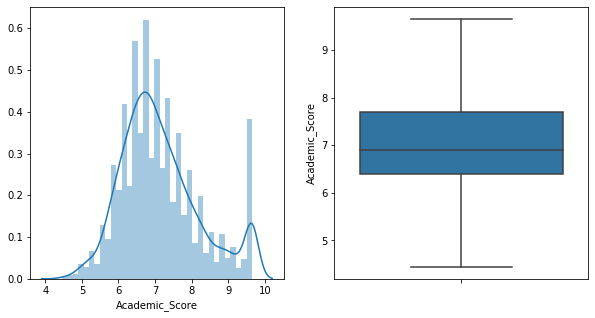

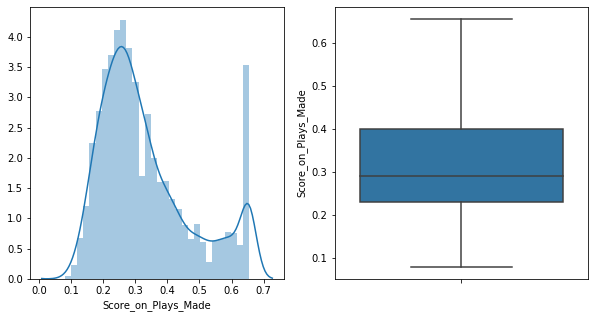

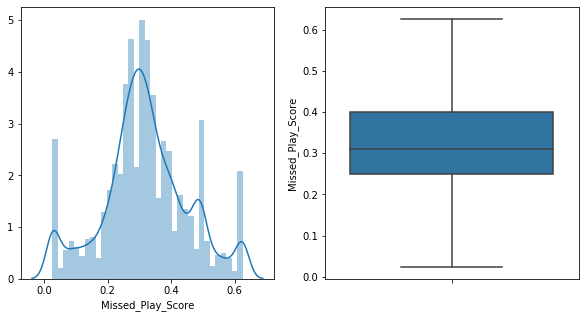

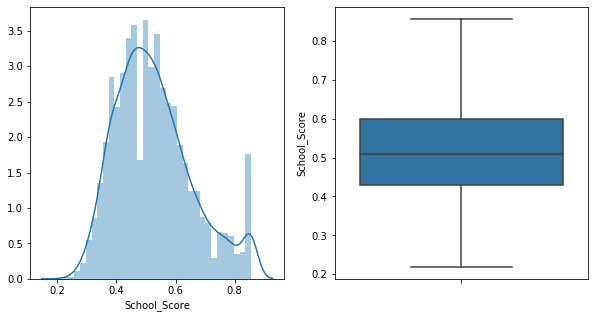

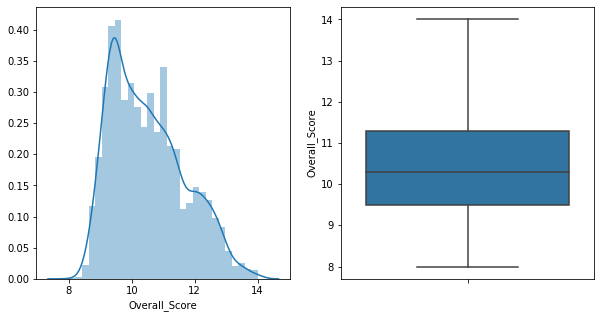

In [55]:
for i in col:
    fig_dims = (10, 5) 
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=fig_dims) 
    sns.distplot(df[i], kde=True, ax=axs[0]) 
    sns.boxplot(x= i, data=df, ax=axs[1],orient="v") 

# change categorical data to numerical

In [56]:
df.replace(injury,inplace=True)
df

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.270,0.36,3,D,0.45,8.8,Eastern,Partial
1,6.3,0.300,0.34,0,C,0.49,9.5,Eastern,Partial
2,8.1,0.280,0.40,2,C,0.44,10.1,Eastern,Partial
3,7.2,0.230,0.32,2,C,0.40,9.9,Eastern,Partial
6,6.2,0.320,0.16,2,C,0.47,9.6,Eastern,Full
...,...,...,...,...,...,...,...,...,...
6209,6.3,0.510,0.13,0,C,0.75,11.0,Eastern,Full
6210,6.8,0.620,0.08,0,C,0.82,9.5,Eastern,Full
6211,6.2,0.600,0.08,0,C,0.58,10.5,Western,Full
6212,5.9,0.550,0.10,0,C,0.76,11.2,Eastern,Full


In [57]:
df.replace(scholar,inplace=True)
df

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.270,0.36,3,D,0.45,8.8,Eastern,0
1,6.3,0.300,0.34,0,C,0.49,9.5,Eastern,0
2,8.1,0.280,0.40,2,C,0.44,10.1,Eastern,0
3,7.2,0.230,0.32,2,C,0.40,9.9,Eastern,0
6,6.2,0.320,0.16,2,C,0.47,9.6,Eastern,1
...,...,...,...,...,...,...,...,...,...
6209,6.3,0.510,0.13,0,C,0.75,11.0,Eastern,1
6210,6.8,0.620,0.08,0,C,0.82,9.5,Eastern,1
6211,6.2,0.600,0.08,0,C,0.58,10.5,Western,1
6212,5.9,0.550,0.10,0,C,0.76,11.2,Eastern,1


In [58]:
df= pd.get_dummies(df,drop_first=True)
df

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.270,0.36,3,0.45,8.8,0,0,1,0,0
1,6.3,0.300,0.34,0,0.49,9.5,0,1,0,0,0
2,8.1,0.280,0.40,2,0.44,10.1,0,1,0,0,0
3,7.2,0.230,0.32,2,0.40,9.9,0,1,0,0,0
6,6.2,0.320,0.16,2,0.47,9.6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6209,6.3,0.510,0.13,0,0.75,11.0,1,1,0,0,0
6210,6.8,0.620,0.08,0,0.82,9.5,1,1,0,0,0
6211,6.2,0.600,0.08,0,0.58,10.5,1,1,0,0,1
6212,5.9,0.550,0.10,0,0.76,11.2,1,1,0,0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 6214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       5268 non-null   float64
 1   Score_on_Plays_Made  5268 non-null   float64
 2   Missed_Play_Score    5268 non-null   float64
 3   Injury_Propensity    5268 non-null   int64  
 4   School_Score         5268 non-null   float64
 5   Overall_Score        5268 non-null   float64
 6   Scholarship          5268 non-null   int64  
 7   School_Type_C        5268 non-null   uint8  
 8   School_Type_D        5268 non-null   uint8  
 9   Region_Southern      5268 non-null   uint8  
 10  Region_Western       5268 non-null   uint8  
dtypes: float64(5), int64(2), uint8(4)
memory usage: 509.8 KB


In [60]:
df2=df.copy()

# build model after treating outlier

In [61]:
df2.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score', 'Scholarship',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western'],
      dtype='object')

In [62]:
formula_3='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Score+Overall_Score+School_Type_C+School_Type_D+Region_Southern+Region_Western'

In [63]:
Logistic_3 = sm.logit(formula=formula_3,data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.444215
         Iterations 6


In [64]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5257
Method:                           MLE   Df Model:                           10
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.3240
Time:                        22:24:02   Log-Likelihood:                -2340.1
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.0594      0.551    -16.430      0.000     -10.140      -7.979
Academic_Score          0.4294      0.044      9.825      0.000       0.344       0.515
Score_on_Plays_Made     5.1342      0.322     15.931      0.000       4.503       5.766
Missed_Play_Score      -1.4835      0.345     -4.303      0.000      -2.159      -0.808
Injury_Propensity      -0.5544      0.043    -12.869      0.000      -0.639      -0.470
School_Score            2.8561      0.312      9.159      0.000       2.245       3.467
Overall_Score           0.2083      0.044      4.705      0.000       0.122       0.295
School_Type_C           1.3066      0.125     10.494      0.000       1.063       1.551
School_Type_D           2.3399      0.204     11.443      0.000       1.939       2.741
Region_Southern        -0.4837      0.091     -5.297      0.000      -0.663      -0.305
Region_Western          0.0227      0.092      0.248      0.804      -0.157       0.202
=======================================================================================
"""

# check VIF for multicolinearity

In [65]:
vif_cal(input_data=df2.drop('Scholarship',axis=1))

Academic_Score  VIF =  1.68
Score_on_Plays_Made  VIF =  1.61
Missed_Play_Score  VIF =  1.52
Injury_Propensity  VIF =  1.73
School_Score  VIF =  1.29
Overall_Score  VIF =  1.97
School_Type_C  VIF =  2.92
School_Type_D  VIF =  4.12
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.25


# remove the least significant predictor: Region_Western and build model again

In [66]:
formula_4='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Score+Overall_Score+School_Type_C+School_Type_D+Region_Southern'

In [67]:
Logistic_4 = sm.logit(formula=formula_4,data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.444221
         Iterations 6


In [68]:
Logistic_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5258
Method:                           MLE   Df Model:                            9
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.3240
Time:                        22:24:02   Log-Likelihood:                -2340.2
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.0536      0.551    -16.433      0.000     -10.133      -7.974
Academic_Score          0.4297      0.044      9.839      0.000       0.344       0.515
Score_on_Plays_Made     5.1483      0.317     16.232      0.000       4.527       5.770
Missed_Play_Score      -1.4857      0.345     -4.311      0.000      -2.161      -0.810
Injury_Propensity      -0.5552      0.043    -12.929      0.000      -0.639      -0.471
School_Score            2.8557      0.312      9.157      0.000       2.244       3.467
Overall_Score           0.2082      0.044      4.702      0.000       0.121       0.295
School_Type_C           1.3042      0.124     10.507      0.000       1.061       1.547
School_Type_D           2.3387      0.204     11.442      0.000       1.938       2.739
Region_Southern        -0.4916      0.085     -5.750      0.000      -0.659      -0.324
=======================================================================================
"""

# again calculate VIF

In [69]:
vif_cal(input_data=df2.drop(['Scholarship','Region_Western'],axis=1))

Academic_Score  VIF =  1.68
Score_on_Plays_Made  VIF =  1.55
Missed_Play_Score  VIF =  1.52
Injury_Propensity  VIF =  1.72
School_Score  VIF =  1.29
Overall_Score  VIF =  1.97
School_Type_C  VIF =  2.9
School_Type_D  VIF =  4.12
Region_Southern  VIF =  1.09


# Find score using sklearn library

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

# skip the variable Region_Western since it was found to be least significant predictor 

# model score check on dataset with outlier

In [72]:
model_1 = LR.fit(df1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],df1['Scholarship'])

In [73]:
model_1.score(df1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],df1['Scholarship'])

0.8416856492027335

In [74]:
model_1_test_class = model_1.predict(df1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
model_1_test_probabilities = model_1.predict_proba(df1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(df1['Scholarship'],model_1_test_class)

array([[3155,  182],
       [ 652, 1279]], dtype=int64)

In [76]:
print(classification_report(df1['Scholarship'],model_1_test_class))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3337
           1       0.88      0.66      0.75      1931

    accuracy                           0.84      5268
   macro avg       0.85      0.80      0.82      5268
weighted avg       0.85      0.84      0.84      5268



In [77]:
from sklearn import metrics

In [78]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train=[]#defining an empty list
    for i in range(0,len(model_1_test_probabilities[:,1])):#defining a loop
        if model_1_test_probabilities[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.accuracy_score(df1['Scholarship'],custom_cutoff_train))
    print(classification_report(df1['Scholarship'],custom_cutoff_train))

0.1 0.46089597570235386
              precision    recall  f1-score   support

           0       0.81      0.20      0.32      3337
           1       0.40      0.92      0.56      1931

    accuracy                           0.46      5268
   macro avg       0.60      0.56      0.44      5268
weighted avg       0.66      0.46      0.40      5268

0.2 0.6560364464692483
              precision    recall  f1-score   support

           0       0.83      0.58      0.68      3337
           1       0.52      0.79      0.63      1931

    accuracy                           0.66      5268
   macro avg       0.67      0.68      0.65      5268
weighted avg       0.71      0.66      0.66      5268

0.3 0.7549354593773728
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3337
           1       0.65      0.73      0.69      1931

    accuracy                           0.75      5268
   macro avg       0.74      0.75      0.74      5268
weig

Model 1 AUC: 0.81620


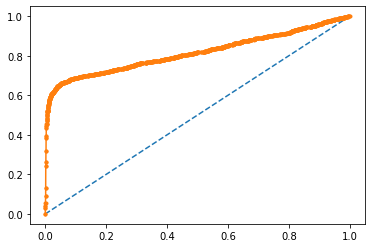

In [79]:
auc = metrics.roc_auc_score(df1['Scholarship'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df1['Scholarship'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# find model score for  data without outlier

# skip the variable Region_Western since it was found to be least significant predictor 

In [80]:
model_2 = LR.fit(df2[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],df2['Scholarship'])

In [81]:
model_2.score(df2[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],df2['Scholarship'])

0.840167046317388

In [82]:
model_2_test_class = model_2.predict(df2[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
model_2_test_probabilities = model_2.predict_proba(df2[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(df2['Scholarship'],model_2_test_class)

array([[3142,  195],
       [ 647, 1284]], dtype=int64)

In [84]:
print(classification_report(df2['Scholarship'],model_2_test_class))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3337
           1       0.87      0.66      0.75      1931

    accuracy                           0.84      5268
   macro avg       0.85      0.80      0.82      5268
weighted avg       0.84      0.84      0.83      5268



In [85]:
from sklearn import metrics

In [86]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train=[]#defining an empty list
    for i in range(0,len(model_2_test_probabilities[:,1])):#defining a loop
        if model_2_test_probabilities[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.accuracy_score(df2['Scholarship'],custom_cutoff_train))
    print(classification_report(df2['Scholarship'],custom_cutoff_train))

0.1 0.4650721336370539
              precision    recall  f1-score   support

           0       0.81      0.20      0.33      3337
           1       0.40      0.91      0.56      1931

    accuracy                           0.47      5268
   macro avg       0.60      0.56      0.44      5268
weighted avg       0.66      0.47      0.41      5268

0.2 0.6543280182232346
              precision    recall  f1-score   support

           0       0.83      0.57      0.68      3337
           1       0.52      0.79      0.63      1931

    accuracy                           0.65      5268
   macro avg       0.67      0.68      0.65      5268
weighted avg       0.71      0.65      0.66      5268

0.3 0.7524677296886864
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3337
           1       0.64      0.73      0.68      1931

    accuracy                           0.75      5268
   macro avg       0.74      0.75      0.74      5268
weigh

Model 1 AUC: 0.81621


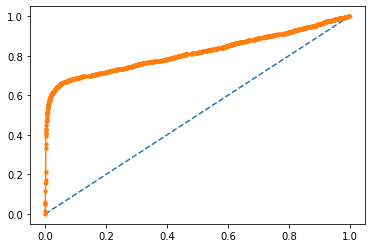

In [87]:
auc = metrics.roc_auc_score(df2['Scholarship'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df2['Scholarship'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# since accuracy score for predicting 1 is same with or without outlier treatment, we can take the model without outlier treatment and variable Region_Western dropped

# variable importance

In [88]:
var_fea=pd.DataFrame({'odds_ratio':(np.exp(model_2.coef_).T).tolist(),'Probability':(np.exp(model_2.coef_)/(1+np.exp(model_2.coef_))).T.tolist()  ,'variable':df2.drop(['Scholarship','Region_Western'],axis=1).columns.tolist()})
var_fea['odds_ratio'] = var_fea['odds_ratio'].str.get(0)

var_fea=var_fea.sort_values('odds_ratio', ascending=False)
var_fea

,odds_ratio,Probability,variable
1,172.142381,[0.9942244065721256],Score_on_Plays_Made
4,17.386446,[0.9456121093725665],School_Score
7,10.368222,[0.9120354944808471],School_Type_D
6,3.684602,[0.7865347134404815],School_Type_C
0,1.536861,[0.6058121127783177],Academic_Score
5,1.231442,[0.5518592391938504],Overall_Score
8,0.611636,[0.3795126369870397],Region_Southern
3,0.573934,[0.364649223482705],Injury_Propensity
2,0.226354,[0.1845749732851682],Missed_Play_Score


# train/test split for model selected in Question 2

In [89]:
df1

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.270,0.36,3,0.45,8.8,0,0,1,0,0
1,6.3,0.300,0.34,0,0.49,9.5,0,1,0,0,0
2,8.1,0.280,0.40,2,0.44,10.1,0,1,0,0,0
3,7.2,0.230,0.32,2,0.40,9.9,0,1,0,0,0
6,6.2,0.320,0.16,2,0.47,9.6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6209,6.3,0.510,0.13,0,0.75,11.0,1,1,0,0,0
6210,6.8,0.620,0.08,0,0.82,9.5,1,1,0,0,0
6211,6.2,0.600,0.08,0,0.58,10.5,1,1,0,0,1
6212,5.9,0.550,0.10,0,0.76,11.2,1,1,0,0,0


In [90]:
X_1=df1.drop('Scholarship',axis=1)
Y_1=df1.pop('Scholarship')

In [91]:
X_1=X_1.drop('Region_Western',axis=1)


In [92]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_1, Y_1, test_size=.30, random_state=1)

In [93]:
model_4 = LR.fit(X_train1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],Y_train1)

In [94]:
model_4_test_class = model_4.predict(X_train1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
model_4_test_probabilities = model_4.predict_proba(X_train1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])

# train accuracy

In [95]:
confusion_matrix(Y_train1,model_4_test_class)

array([[2225,  122],
       [ 446,  894]], dtype=int64)

In [96]:
print(classification_report(Y_train1,model_4_test_class))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2347
           1       0.88      0.67      0.76      1340

    accuracy                           0.85      3687
   macro avg       0.86      0.81      0.82      3687
weighted avg       0.85      0.85      0.84      3687



Model 1 AUC: 0.82088


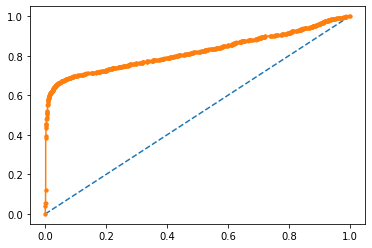

In [97]:
auc = metrics.roc_auc_score(Y_train1,model_4_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train1,model_4_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# test accuracy

In [98]:
model_4_test_class_test = model_4.predict(X_test1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
model_4_test_probabilities_test = model_4.predict_proba(X_test1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])

In [99]:
confusion_matrix(Y_test1,model_4_test_class_test)

array([[931,  59],
       [212, 379]], dtype=int64)

In [100]:
print(classification_report(Y_test1,model_4_test_class_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       990
           1       0.87      0.64      0.74       591

    accuracy                           0.83      1581
   macro avg       0.84      0.79      0.80      1581
weighted avg       0.83      0.83      0.82      1581



Model 1 AUC: 0.80540


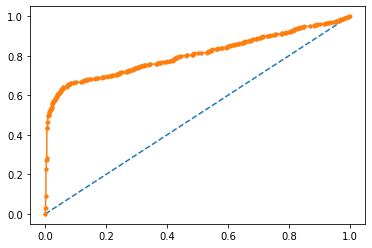

In [101]:
auc = metrics.roc_auc_score(Y_test1,model_4_test_probabilities_test[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test1,model_4_test_probabilities_test[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# train/test split for outlier treated data

In [102]:
df

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.270,0.36,3,0.45,8.8,0,0,1,0,0
1,6.3,0.300,0.34,0,0.49,9.5,0,1,0,0,0
2,8.1,0.280,0.40,2,0.44,10.1,0,1,0,0,0
3,7.2,0.230,0.32,2,0.40,9.9,0,1,0,0,0
6,6.2,0.320,0.16,2,0.47,9.6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6209,6.3,0.510,0.13,0,0.75,11.0,1,1,0,0,0
6210,6.8,0.620,0.08,0,0.82,9.5,1,1,0,0,0
6211,6.2,0.600,0.08,0,0.58,10.5,1,1,0,0,1
6212,5.9,0.550,0.10,0,0.76,11.2,1,1,0,0,0


In [103]:
df3=df.copy()

In [104]:
X=df.drop('Scholarship',axis=1)
Y=df.pop('Scholarship')

In [105]:
X=X.drop('Region_Western',axis=1)


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)

In [107]:
model_3 = LR.fit(X_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],Y_train)

In [108]:
model_3_test_class = model_3.predict(X_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
model_3_test_probabilities = model_3.predict_proba(X_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])

# train accuracy

In [109]:
confusion_matrix(Y_train,model_3_test_class)

array([[2220,  127],
       [ 434,  906]], dtype=int64)

In [110]:
print(classification_report(Y_train,model_3_test_class))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2347
           1       0.88      0.68      0.76      1340

    accuracy                           0.85      3687
   macro avg       0.86      0.81      0.83      3687
weighted avg       0.85      0.85      0.84      3687



Model 1 AUC: 0.82071


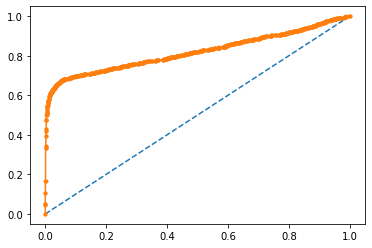

In [111]:
auc = metrics.roc_auc_score(Y_train,model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# test accuracy

In [112]:
model_3_test_class_test = model_3.predict(X_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
model_3_test_probabilities_test = model_3.predict_proba(X_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])

In [113]:
confusion_matrix(Y_test,model_3_test_class_test)

array([[929,  61],
       [214, 377]], dtype=int64)

In [114]:
print(classification_report(Y_test,model_3_test_class_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       990
           1       0.86      0.64      0.73       591

    accuracy                           0.83      1581
   macro avg       0.84      0.79      0.80      1581
weighted avg       0.83      0.83      0.82      1581



Model 1 AUC: 0.80607


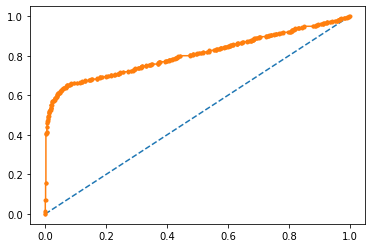

In [115]:
auc = metrics.roc_auc_score(Y_test,model_3_test_probabilities_test[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,model_3_test_probabilities_test[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# variable importance

In [116]:
var_imp=pd.DataFrame({'odds_ratio':(np.exp(model_3.coef_).T).tolist(),'Probability':(np.exp(model_3.coef_)/(1+np.exp(model_3.coef_))).T.tolist()  ,'variable':X_train.columns.tolist()})
var_imp['odds_ratio'] = var_imp['odds_ratio'].str.get(0)

var_imp=var_imp.sort_values('odds_ratio', ascending=False)
var_imp

,odds_ratio,Probability,variable
1,223.683101,[0.9955492869927006],Score_on_Plays_Made
4,15.552350,[0.9395856191474565],School_Score
7,11.746483,[0.921546985995996],School_Type_D
6,3.940856,[0.7976059130370937],School_Type_C
0,1.554705,[0.6085654461833114],Academic_Score
5,1.248603,[0.5552793794650714],Overall_Score
8,0.612323,[0.37977681425551896],Region_Southern
3,0.573293,[0.36439051267432737],Injury_Propensity
2,0.205717,[0.17061771741506188],Missed_Play_Score


# LDA on model finalized above(the one with outlier)

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [118]:
LDA = LinearDiscriminantAnalysis()

In [119]:
model_1_LDA = LDA.fit(X_train1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],Y_train1)

# Model accuracy on train data

In [120]:
model_1_LDA_test_class = model_1_LDA.predict(X_train1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
model_1_LDA_test_probabilities = model_1_LDA.predict_proba(X_train1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])

In [121]:
confusion_matrix(Y_train1,model_1_LDA_test_class)

array([[2247,  100],
       [ 456,  884]], dtype=int64)

In [122]:
print(classification_report(Y_train1,model_1_LDA_test_class))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2347
           1       0.90      0.66      0.76      1340

    accuracy                           0.85      3687
   macro avg       0.86      0.81      0.83      3687
weighted avg       0.86      0.85      0.84      3687



Model 1 AUC: 0.82050


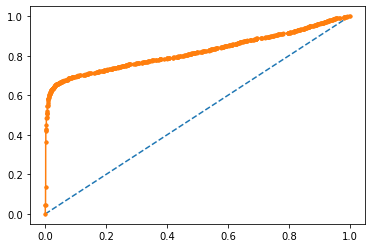

In [123]:
auc = metrics.roc_auc_score(Y_train1,model_1_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train1,model_1_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# model accuracy on test data

In [124]:
model_1_LDA_test_class_test = model_1_LDA.predict(X_test1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
model_1_LDA_test_probabilities_test = model_1_LDA.predict_proba(X_test1[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])

In [125]:
confusion_matrix(Y_test1,model_1_LDA_test_class_test)

array([[940,  50],
       [220, 371]], dtype=int64)

In [126]:
print(classification_report(Y_test1,model_1_LDA_test_class_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       990
           1       0.88      0.63      0.73       591

    accuracy                           0.83      1581
   macro avg       0.85      0.79      0.80      1581
weighted avg       0.84      0.83      0.82      1581



Model 1 AUC: 0.80449


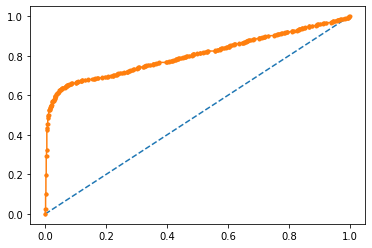

In [127]:
auc = metrics.roc_auc_score(Y_test1,model_1_LDA_test_probabilities_test[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test1,model_1_LDA_test_probabilities_test[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()